## Task 1 - Prediction using Supervised ML (Linear Regression)
#### Predicting the percentage of marks of an student based on the number of study hours

### Programming language used is PYTHON
### importing libaries for the task

In [1]:
import pandas as pd  #for reading csv
import numpy as np  # for vectors in python
import matplotlib.pyplot as plt # for data visualisation
# to plot graph in jupyter notebook
%matplotlib inline

In [2]:
# Reading csv from url using pandas
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print(data.columns) # checking columns
data.isnull().sum() # no null values

Index(['Hours', 'Scores'], dtype='object')


Hours     0
Scores    0
dtype: int64

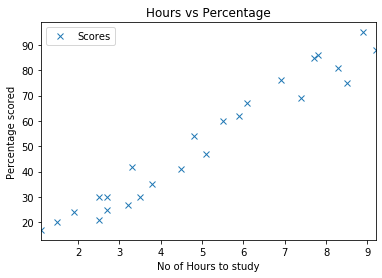

In [4]:
# plot graph to visualise
data.plot(x='Hours', y = 'Scores', style = 'x')
plt.title('Hours vs Percentage')
plt.xlabel('No of Hours to study')
plt.ylabel('Percentage scored')
plt.show()

In [5]:
#creating vectors using numpy

X = data.iloc[:,:-1].values  # features (inputs)
y = data.iloc[:,1].values   # labels (outputs)

In [6]:
# to divide data into train and test.
# this is important to avoid overfitting.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
#import linear regression in sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

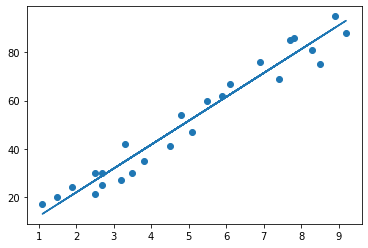

In [8]:
#line is bit fit for data
line = model.coef_*X + model.intercept_

#Plotting for the test data

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [9]:
#Testing
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
y_pred = model.predict(X_test) #Predicting scores
df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
#checking RMSE and MAE for regression.
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squaren Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Root Mean Squaren Error: 4.6474476121003665


In [12]:
print('Training score : ',model.score(X_train,y_train))
print('Test Score : ',model.score(X_test,y_test))

Training score :  0.9515510725211553
Test Score :  0.9454906892105356


In [13]:
# Q: Predicting the percentage if the amount of hours studied is 9.25hrs/day?

hours = 9.25
my_pred= model.predict([[hours]])
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


In [14]:
#score
print(my_pred[0])

93.69173248737538
